# Sagar Kumar 210968002
# DSE B Batch 1
# Week 2 - ANN

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import itertools as it

In [3]:
df = pd.read_csv("churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Preprocessing


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [47]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Geography = le.fit_transform(df.Geography)

In [9]:
df['Balance'] = df['Balance'].mask(df['Balance'] == 0).fillna(df['Balance'].mean())
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,76485.889288,1,1,1,101348.88,1
1,608,2,0,41,1,83807.860000,1,0,1,112542.58,0
2,502,0,0,42,8,159660.800000,3,1,0,113931.57,1
3,699,0,0,39,1,76485.889288,2,0,0,93826.63,0
4,850,2,0,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,76485.889288,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.610000,1,1,1,101699.77,0
9997,709,0,0,36,7,76485.889288,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.310000,2,1,0,92888.52,1


In [10]:
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = StandardScaler().fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,-1.041760,-0.869761,-0.911583,1,1,0.021886,1
1,-0.440036,2,0,0.198164,-1.387538,-0.639565,-0.911583,0,1,0.216534,0
2,-1.536794,0,0,0.293517,1.032908,1.745183,2.527057,1,0,0.240687,1
3,0.501521,0,0,0.007457,-1.387538,-0.869761,0.807737,0,0,-0.108918,0
4,2.063884,2,0,0.388871,-1.041760,0.671538,-0.911583,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,-0.004426,-0.869761,0.807737,1,0,-0.066419,0
9996,-1.391939,0,1,-0.373958,1.724464,-1.470759,-0.911583,1,1,0.027988,0
9997,0.604988,0,0,-0.278604,0.687130,-0.869761,-0.911583,0,1,-1.008643,1
9998,1.256835,1,1,0.293517,-0.695982,-0.914108,0.807737,1,0,-0.125231,1


In [11]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [12]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,0.293517,-1.041760,-0.869761,-0.911583,1,1,0.021886
1,-0.440036,2,0,0.198164,-1.387538,-0.639565,-0.911583,0,1,0.216534
2,-1.536794,0,0,0.293517,1.032908,1.745183,2.527057,1,0,0.240687
3,0.501521,0,0,0.007457,-1.387538,-0.869761,0.807737,0,0,-0.108918
4,2.063884,2,0,0.388871,-1.041760,0.671538,-0.911583,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,-0.004426,-0.869761,0.807737,1,0,-0.066419
9996,-1.391939,0,1,-0.373958,1.724464,-1.470759,-0.911583,1,1,0.027988
9997,0.604988,0,0,-0.278604,0.687130,-0.869761,-0.911583,0,1,-1.008643
9998,1.256835,1,1,0.293517,-0.695982,-0.914108,0.807737,1,0,-0.125231


In [13]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Q2 and Q3

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1034,0.129037,0,1,0.674932,-0.695982,-0.869761,0.807737,0,1,1.324796
7994,-1.360899,1,0,-1.708908,-1.387538,1.494948,2.527057,1,1,1.218072
516,-1.888585,0,0,1.628468,1.724464,-0.869761,2.527057,0,1,-0.657884
44,0.097996,2,0,2.105236,-0.004426,1.627925,-0.911583,1,1,1.012877
1406,-0.812520,2,1,-1.518201,-1.041760,0.714380,-0.911583,0,1,-0.574709
...,...,...,...,...,...,...,...,...,...,...
2895,-0.305528,1,1,0.770285,0.687130,0.100997,-0.911583,1,1,-0.578897
7813,0.346319,1,0,2.295943,-0.695982,-0.720114,-0.911583,1,0,-0.529442
905,0.222158,0,0,0.579578,1.378686,-0.869761,-0.911583,1,1,-0.140200
5192,0.129037,0,0,0.007457,1.032908,-0.869761,0.807737,1,1,0.018757


In [15]:
dims = X_train.shape[1]
dims

10

In [16]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [20]:
model1 = Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(2, activation='sigmoid', input_shape=(dims,)),
    ])
model2 = Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(64, activation='relu', input_shape=(dims,)),
        Dense(2, activation='sigmoid', input_shape=(dims,)),
    ])
model3 = Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(64, activation='relu', input_shape=(dims,)),
        Dense(32, activation='relu', input_shape=(dims,)),
        Dense(2, activation='sigmoid', input_shape=(dims,)),
    ])
models = list(it.repeat([model1,model2,model3], 9))
models

[[<keras.engine.sequential.Sequential at 0x791138397e80>,

In [21]:
batch_size = 10
epochs = [10, 20, 30]
learning_rate = [0.1, 0.01, 0.001]

In [22]:
for i in models:
    for j in range(len(i)):
        i[j].compile(optimizer=Adam(learning_rate=learning_rate[j]), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
trains = [
    i[j].fit(X_train, y_train, epochs=epochs[j], batch_size=batch_size, validation_split=0.15) for j in range(len(i)) for i in models
]

Epoch 1/10
723/723 [==============================] - 8s 3ms/step - loss: 0.5520 - accuracy: 0.8037 - val_loss: 0.5218 - val_accuracy: 0.8173
Epoch 2/10
723/723 [==============================] - 2s 3ms/step - loss: 0.4803 - accuracy: 0.8303 - val_loss: 0.4630 - val_accuracy: 0.8267
Epoch 3/10
723/723 [==============================] - 2s 3ms/step - loss: 0.4581 - accuracy: 0.8368 - val_loss: 0.4280 - val_accuracy: 0.8424
Epoch 4/10
723/723 [==============================] - 2s 3ms/step - loss: 0.4458 - accuracy: 0.8352 - val_loss: 1.3113 - val_accuracy: 0.7733
Epoch 5/10
723/723 [==============================] - 3s 4ms/step - loss: 0.4605 - accuracy: 0.8421 - val_loss: 0.4624 - val_accuracy: 0.8439
Epoch 6/10
723/723 [==============================] - 2s 3ms/step - loss: 0.4490 - accuracy: 0.8371 - val_loss: 0.4380 - val_accuracy: 0.8400
Epoch 7/10
723/723 [==============================] - 2s 3ms/step - loss: 0.4518 - accuracy: 0.8342 - val_loss: 0.4328 - val_accuracy: 0.8455
Epoch 

In [38]:
tlosses = [train.history['loss'] for train in trains]
tlosses

[[0.5520228743553162,
  0.4803439974784851,
  0.4581088721752167,
  0.44582751393318176,
  0.4604828655719757,
  0.44903984665870667,
  0.4517512321472168,
  0.44727128744125366,
  0.4600333869457245,
  0.4449966251850128],
 [0.4432846009731293,
  0.46112731099128723,
  0.44871386885643005,
  0.44395506381988525,
  0.4588779807090759,
  0.4483475387096405,
  0.4639151394367218,
  0.4481881558895111,
  0.4307745397090912,
  0.4336267411708832],
 [0.45402830839157104,
  0.4500446319580078,
  0.43201345205307007,
  0.43865761160850525,
  0.44405844807624817,
  0.43381941318511963,
  0.4326268434524536,
  0.4294913411140442,
  0.44321513175964355,
  0.43432924151420593],
 [0.43514397740364075,
  0.43492621183395386,
  0.49327030777931213,
  0.47388792037963867,
  0.4413532614707947,
  0.45195236802101135,
  0.44798752665519714,
  0.4391021132469177,
  0.45287320017814636,
  0.4344885051250458],
 [0.44504013657569885,
  0.43026673793792725,
  0.43389394879341125,
  0.4413388669490814,
  0.4

In [39]:
vlosses = [val.history['val_loss'] for val in trains]
vlosses

[[0.5218056440353394,
  0.462955504655838,
  0.428025484085083,
  1.3112781047821045,
  0.46241530776023865,
  0.43798261880874634,
  0.4327619969844818,
  0.44983091950416565,
  0.45067641139030457,
  0.48393434286117554],
 [0.4462003707885742,
  0.4837951362133026,
  0.43756720423698425,
  0.4384033679962158,
  0.43272528052330017,
  0.45322155952453613,
  0.4283715784549713,
  0.4788750410079956,
  0.4512051045894623,
  0.5766175389289856],
 [0.4301033616065979,
  0.4455040693283081,
  0.4352092444896698,
  0.4783545732498169,
  0.4336327612400055,
  0.4347476363182068,
  0.4522789716720581,
  0.46037736535072327,
  0.42256873846054077,
  0.4524284303188324],
 [0.4368581473827362,
  0.43028372526168823,
  0.46875616908073425,
  0.4686793386936188,
  0.4276682734489441,
  0.47164812684059143,
  0.45582932233810425,
  0.5470874309539795,
  0.45270368456840515,
  0.45420995354652405],
 [0.4434669017791748,
  0.43617695569992065,
  0.4438372254371643,
  0.4361151456832886,
  0.431743353

## Plots - Question 5

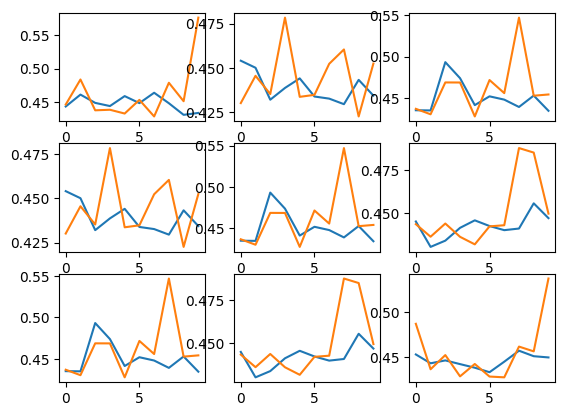

In [43]:
epoch_index = 0
fig, axs = plt.subplots(3, 3)

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), train_losses[1 + j + k])
        axs[j, k].plot(range(epochs[epoch_index]), val_losses[1 + j + k])

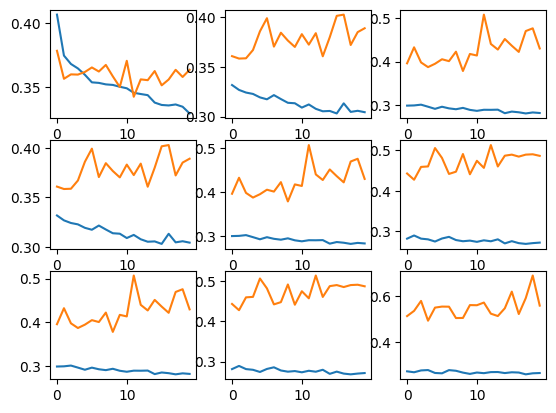

In [41]:
epoch_index = 1
fig, axs = plt.subplots(3, 3)

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), train_losses[9 + j + k])
        axs[j, k].plot(range(epochs[epoch_index]), val_losses[9 + j + k])


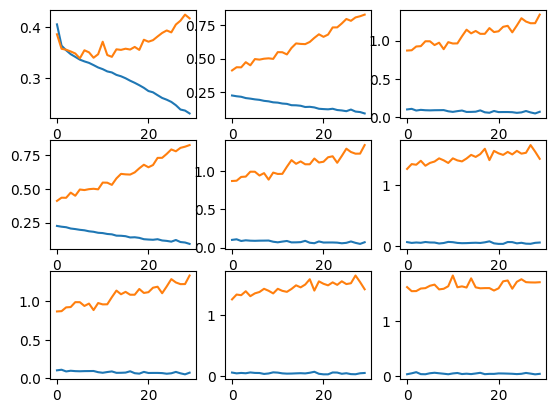

In [42]:

epoch_index = 2
fig, axs = plt.subplots(3, 3)

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), train_losses[18 + j + k])
        axs[j, k].plot(range(epochs[epoch_index]), val_losses[18 + j + k])


## Evaluation

In [46]:
z=1
for i in range(9):
  for model in models[i]:
    loss, accuracy = model.evaluate(X_test,y_test)
    print("model : {} --> loss : {} , accuracy : {}".format(z,loss,accuracy))
    z+=1

47/47 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.8273
model : 1 --> loss : 0.4520822763442993 , accuracy : 0.8273333311080933
47/47 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 0.8427
model : 2 --> loss : 0.6429932713508606 , accuracy : 0.8426666855812073
47/47 [==============================] - 0s 3ms/step - loss: 2.3296 - accuracy: 0.8087
model : 3 --> loss : 2.3296470642089844 , accuracy : 0.8086666464805603
47/47 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.8273
model : 4 --> loss : 0.4520822763442993 , accuracy : 0.8273333311080933
47/47 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.8427
model : 5 --> loss : 0.6429932713508606 , accuracy : 0.8426666855812073
47/47 [==============================] - 0s 3ms/step - loss: 2.3296 - accuracy: 0.8087
model : 6 --> loss : 2.3296470642089844 , accuracy : 0.8086666464805603
47/47 [==============================] - 0s 2m